In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [114]:
import pandas as pd
import re
import requests
from dotenv import load_dotenv
import os
load_dotenv()

In [ ]:
!pip install geopandas

In [ ]:
#
import geopandas as gpd
from shapely.geometry import LineString, MultiLineString
from shapely import wkt


In [4]:
base_path = '/content/drive/MyDrive'

In [ ]:
df = pd.read_excel(f'{base_path}/data/bkk/condo/ddcondo/อัพเดทห้อง รหัส A.xlsx')

In [ ]:
df

,Code2,ประเภท,Project (อื่นๆ),Project (คอนโด),Subway (รถไฟฟ้า),For (สำหรับ),Pet-Friendly,Rent,Sale,Type Room,...,จำนวนชั้น,ทิศ,วิว,สัญญา (กรณีเช่า),Unnamed: 17,Unnamed: 18,Map,Status,Update,ลงเว็บ3
0,#A1241 ✅ 1/1/67,NaN,NaN,คาซ่า คอนโด รัชดา-ท่าพระ ( Casa Condo Ratchada...,BTS ตลาดพลู,เช่า,NaN,9500.0,NaN,1 ห้องนอน 1 ห้องน้ำ,...,NaN,NaN,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://goo.gl/maps/uwqs1T1mBPSWBWPa9,ไม่ว่าง,2024-02-24,https://www.facebook.com/ddcondoland.88/posts/...
1,#A1241 ✅ 1/2/67,NaN,NaN,วอเตอร์ฟอร์ด พาร์ค พระราม 4 ( Waterford Park R...,BTS พระโขนง,เช่า,NaN,30000.0,NaN,2 ห้องนอน 1 ห้องน้ำ,...,NaN,NaN,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://maps.app.goo.gl/fvsFUAjv91stiFyb9,ว่าง,2024-01-26,https://www.facebook.com/ddcondoland.88/posts/...
2,#A1241 ✅ 1/3/67,NaN,NaN,ดิ เอ็มโพริโอ เพลส ( The Emporio Place ),BTS พร้อมพงษ์,เช่า,NaN,90000.0,NaN,3 ห้องนอน 3 ห้องน้ำ,...,NaN,NaN,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://maps.app.goo.gl/fPsveX6ZbkWuUMM1A,ว่าง,2024-02-27,https://www.facebook.com/ddcondoland.88/posts/...
3,#A1241 ✅ 1/4/67,NaN,NaN,เดอะ รูม สาทร - เซนหลุยส์ ( The Room Sathorn -...,NaN,เช่า,NaN,28000.0,NaN,2 ห้องนอน 2 ห้องน้ำ,...,NaN,NaN,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://maps.app.goo.gl/dNXT3by6gYxGf5798,ว่าง,2024-03-26,https://www.facebook.com/ddcondoland.88/posts/...
4,#A1241 ✅ 1/5/67,NaN,NaN,เดอะ ฟายน์ แบงค็อค ทองหล่อ-เอกมัย ( The FINE B...,BTS เอกมัย,เช่า,NaN,26500.0,NaN,1 ห้องนอน 1 ห้องน้ำ,...,NaN,NaN,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://goo.gl/maps/XXxjrDTFUyQQk3he6,ว่าง,2024-04-28,https://www.facebook.com/ddcondoland.88/posts/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9637,#A12499 ✅ 27/9/67,คอนโด,NaN,เดอะ ไลน์ สุขุมวิท 71 ( THE LINE Sukhumvit 71 ),BTS พระโขนง,เช่า,NaN,18000.0,NaN,1 ห้องนอน 1 ห้องน้ำ,...,NaN,ระเบียงทิศใต้,วิวเมือง,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://maps.app.goo.gl/8qtj3Xikfq4dfq7DA,ไม่ว่าง,2024-10-10,https://www.facebook.com/ddcondoland.88/posts/...
9638,#A12499 ✅ 28/11/67,คอนโด,NaN,ลุมพินี วิลล์ พัฒนาการ - ศรีนครินทร์ ( Lumpini...,NaN,เช่า,NaN,16000.0,NaN,1 ห้องนอน 1 ห้องน้ำ,...,NaN,NaN,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://maps.app.goo.gl/pgyfuKjh2XAf1A9n9,ว่าง,2024-11-28,https://www.facebook.com/share/p/17mAb9vfV5/
9639,#A12499 ✅ 28/12/67,คอนโด,NaN,ลุมพินี เพลส พระราม 4 - สาทร ( Lumpini Place R...,"MRT ลุมพินี, MRT คลองเตย",เช่า,NaN,13500.0,NaN,สตูดิโอ 1 ห้องน้ำ,...,NaN,NaN,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://goo.gl/maps/dYqze1K1h6iykUaD9,ว่าง,2024-12-28,NaN
9640,#A12499 ✅ 28/5/67,NaN,NaN,สโคป หลังสวน ( SCOPE Langsuan ),BTS ชิดลม,เช่า,NaN,200000.0,NaN,1 ห้องนอน 2 ห้องน้ำ,...,NaN,NaN,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://maps.app.goo.gl/dqBmFL8P3NE2uDhQ7,ว่าง,2024-05-28,https://www.facebook.com/ddcondoland.88/posts/...


In [ ]:
# prompt: cpnvert Map url to lat and lng

def extract_lat_lng_from_url(short_url):
    try:
        # Follow the redirect
        response = requests.get(short_url, allow_redirects=True)
        full_url = response.url
        print(full_url)

        # Extract coordinates using regex
        match = re.search(r'%40(-?\d+\.\d+),(-?\d+\.\d+)', full_url)
        print(match)
        if match:
            lat = float(match.group(1))
            lng = float(match.group(2))
            return pd.Series([lat, lng])
        else:
            return pd.Series([None, None])
    except Exception as e:
        print('error',e)
        return pd.Series([None, None])

# Apply the function to your DataFrame
df[['latitude', 'longitude']] = df['Map'].apply(extract_lat_lng_from_url)
df


Streaming output truncated to the last 5000 lines.
https://www.google.com/sorry/index?continue=https://www.google.com/maps/place/Blossom%2BCondo%2B%25E0%25B8%25AA%25E0%25B8%25B2%25E0%25B8%2597%25E0%25B8%25A3-%25E0%25B9%2580%25E0%25B8%2588%25E0%25B8%25A3%25E0%25B8%25B4%25E0%25B8%258D%25E0%25B8%25A3%25E0%25B8%25B2%25E0%25B8%25A9%25E0%25B8%258E%25E0%25B8%25A3%25E0%25B9%258C/%4013.7107676,100.5174301,17z/data%3D!3m1!4b1!4m6!3m5!1s0x30e29917e1eb40e5:0xf27d0ae27e769c89!8m2!3d13.7107624!4d100.520005!16s%252Fg%252F11fmpl466b%3Fauthuser%3D0%26hl%3Dth%26entry%3Dtts&hl=th&q=EgQj913jGPme38AGIjBQdZnDwcEn24m0Uqi97nlKWV_7YVm2u8BcOszes08IYaoqYvAl3Z6xNWtJyldk2akyAnJSWgFD
<re.Match object; span=(323, 348), match='%4013.7107676,100.5174301'>
https://www.google.com/sorry/index?continue=https://www.google.com/maps/place/The%2BPrivacy%2BS101/%4013.6908782,100.6107589,17z/data%3D!3m1!4b1!4m5!3m4!1s0x30e29fd448020d0f:0x10f92cf278cf90b7!8m2!3d13.6908782!4d100.6129476%3Fshorturl%3D1&q=EgQj913jGPqe38AGIjDgc0xfZh

,Code2,ประเภท,Project (อื่นๆ),Project (คอนโด),Subway (รถไฟฟ้า),For (สำหรับ),Pet-Friendly,Rent,Sale,Type Room,...,วิว,สัญญา (กรณีเช่า),Unnamed: 17,Unnamed: 18,Map,Status,Update,ลงเว็บ3,latitude,longitude
0,#A1241 ✅ 1/1/67,NaN,NaN,คาซ่า คอนโด รัชดา-ท่าพระ ( Casa Condo Ratchada...,BTS ตลาดพลู,เช่า,NaN,9500.0,NaN,1 ห้องนอน 1 ห้องน้ำ,...,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://goo.gl/maps/uwqs1T1mBPSWBWPa9,ไม่ว่าง,2024-02-24,https://www.facebook.com/ddcondoland.88/posts/...,13.713496,100.474112
1,#A1241 ✅ 1/2/67,NaN,NaN,วอเตอร์ฟอร์ด พาร์ค พระราม 4 ( Waterford Park R...,BTS พระโขนง,เช่า,NaN,30000.0,NaN,2 ห้องนอน 1 ห้องน้ำ,...,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://maps.app.goo.gl/fvsFUAjv91stiFyb9,ว่าง,2024-01-26,https://www.facebook.com/ddcondoland.88/posts/...,13.684200,100.557713
2,#A1241 ✅ 1/3/67,NaN,NaN,ดิ เอ็มโพริโอ เพลส ( The Emporio Place ),BTS พร้อมพงษ์,เช่า,NaN,90000.0,NaN,3 ห้องนอน 3 ห้องน้ำ,...,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://maps.app.goo.gl/fPsveX6ZbkWuUMM1A,ว่าง,2024-02-27,https://www.facebook.com/ddcondoland.88/posts/...,13.722987,100.564518
3,#A1241 ✅ 1/4/67,NaN,NaN,เดอะ รูม สาทร - เซนหลุยส์ ( The Room Sathorn -...,NaN,เช่า,NaN,28000.0,NaN,2 ห้องนอน 2 ห้องน้ำ,...,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://maps.app.goo.gl/dNXT3by6gYxGf5798,ว่าง,2024-03-26,https://www.facebook.com/ddcondoland.88/posts/...,13.707419,100.524096
4,#A1241 ✅ 1/5/67,NaN,NaN,เดอะ ฟายน์ แบงค็อค ทองหล่อ-เอกมัย ( The FINE B...,BTS เอกมัย,เช่า,NaN,26500.0,NaN,1 ห้องนอน 1 ห้องน้ำ,...,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://goo.gl/maps/XXxjrDTFUyQQk3he6,ว่าง,2024-04-28,https://www.facebook.com/ddcondoland.88/posts/...,13.730617,100.585166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9637,#A12499 ✅ 27/9/67,คอนโด,NaN,เดอะ ไลน์ สุขุมวิท 71 ( THE LINE Sukhumvit 71 ),BTS พระโขนง,เช่า,NaN,18000.0,NaN,1 ห้องนอน 1 ห้องน้ำ,...,วิวเมือง,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://maps.app.goo.gl/8qtj3Xikfq4dfq7DA,ไม่ว่าง,2024-10-10,https://www.facebook.com/ddcondoland.88/posts/...,13.715155,100.592132
9638,#A12499 ✅ 28/11/67,คอนโด,NaN,ลุมพินี วิลล์ พัฒนาการ - ศรีนครินทร์ ( Lumpini...,NaN,เช่า,NaN,16000.0,NaN,1 ห้องนอน 1 ห้องน้ำ,...,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://maps.app.goo.gl/pgyfuKjh2XAf1A9n9,ว่าง,2024-11-28,https://www.facebook.com/share/p/17mAb9vfV5/,13.736725,100.617757
9639,#A12499 ✅ 28/12/67,คอนโด,NaN,ลุมพินี เพลส พระราม 4 - สาทร ( Lumpini Place R...,"MRT ลุมพินี, MRT คลองเตย",เช่า,NaN,13500.0,NaN,สตูดิโอ 1 ห้องน้ำ,...,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://goo.gl/maps/dYqze1K1h6iykUaD9,ว่าง,2024-12-28,NaN,13.722867,100.545955
9640,#A12499 ✅ 28/5/67,NaN,NaN,สโคป หลังสวน ( SCOPE Langsuan ),BTS ชิดลม,เช่า,NaN,200000.0,NaN,1 ห้องนอน 2 ห้องน้ำ,...,NaN,ค่าเช่ารวมค่าส่วนกลาง,1 ปี,NaN,https://maps.app.goo.gl/dqBmFL8P3NE2uDhQ7,ว่าง,2024-05-28,https://www.facebook.com/ddcondoland.88/posts/...,13.742440,100.541554


In [ ]:
df.to_csv(f'{base_path}/data/bkk/condo/ddcondo/A.csv',index=False)

In [5]:
df_with_lat_lng = pd.read_csv(f'{base_path}/data/bkk/condo/ddcondo/A.csv')

In [6]:
df_with_lat_lng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9642 entries, 0 to 9641
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code2             9642 non-null   object 
 1   ประเภท            3893 non-null   object 
 2   Project (อื่นๆ)   3 non-null      object 
 3   Project (คอนโด)   9639 non-null   object 
 4   Subway (รถไฟฟ้า)  8536 non-null   object 
 5   For (สำหรับ)      9642 non-null   object 
 6   Pet-Friendly      115 non-null    object 
 7   Rent              8669 non-null   float64
 8   Sale              980 non-null    float64
 9   Type Room         9642 non-null   object 
 10  Size              9642 non-null   object 
 11  Floor             9639 non-null   object 
 12  ตึก               2560 non-null   object 
 13  จำนวนชั้น         0 non-null      float64
 14  ทิศ               927 non-null    object 
 15  วิว               1180 non-null   object 
 16  สัญญา (กรณีเช่า)  8679 non-null   object 


In [8]:
# df_with_lat_lng[df_with_lat_lng['latitude'].isna()]

In [324]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Assuming you have the DataFrame `df` loaded with the columns `latitude`, `longitude`, and `Rent`

# Filter data for entries where rent is not null and coordinates are valid
df_cleaned = df_with_lat_lng.dropna(subset=['Project (คอนโด)','latitude', 'longitude', 'Rent'])
df_cleaned = df_cleaned[df_cleaned['Rent']<20000]
# Get the minimum rent for each location (if there are multiple entries for the same location)
df_min_rent = df_cleaned.groupby(['Project (คอนโด)','latitude', 'longitude'], as_index=False)['Rent'].max()

def plot_condo_data(fig):
  fig.add_trace(go.Scattermapbox(
    lat=df_min_rent['latitude'],
    lon=df_min_rent['longitude'],
    customdata=df_min_rent[df_min_rent.columns].values,
    mode='markers',
    marker=dict(
        # size=df_min_rent['Rent'] / 1000,  # Adjust the size of markers based on rent
        color=df_min_rent['Rent'],  # Color by rent
        colorscale='Viridis',  # Color scale for rent values
        colorbar=dict(title='Rent'),
        opacity=0.7
    ),
    text=df_min_rent['Rent'],  # Display rent value when hovering over the marker
    hovertemplate=(
        "<b>Location:</b> %{customdata[0]}<br>" +
        "Latitude: %{lat}<br>" +
        "Longitude: %{lon}<br>" +
        "<b>Minimum Rent:</b><br>" +
        "฿%{marker.color:.2f}<br>" +  # Display rent value with currency format
        "<extra></extra>"  # Removes the extra info that shows by default
    )
))

  # Set the map style and other layout options
  fig.update_layout(
      mapbox_style="carto-positron",  # Map style
      mapbox_center_lon=df_min_rent['longitude'].mean(),  # Center map on average longitude
      mapbox_center_lat=df_min_rent['latitude'].mean(),  # Center map on average latitude
      mapbox_zoom=10,  # Initial zoom level
      title="Map of Minimum Rent by Location",
  )
  # fig.update_layout(map_style="dark")
  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  return fig

fig = go.Figure()
fig = plot_condo_data(fig)
# Create the Plotly 3D scatter plot with bars


# Show the figure
fig.show()


In [304]:
bts_color_dict = {
    '001':"#00807D",
    '002':"#7AB420",
    '003':'#a88b34'
}

In [305]:
bts_line_df = gpd.read_file(f'{base_path}/data/bkk/bts/bts_line/bts_line.shp',encoding='windows-874')
bts_line_df['color'] = bts_line_df['id_btsline'].map(bts_color_dict)


bts_line_df = bts_line_df.set_crs(epsg=32647)  # Example: UTM Zone 47N (adjust if needed)
bts_line_df = bts_line_df.to_crs(epsg=4326)    # Reproject to lat/lon

In [306]:
bts_line_df

,num_sta,name,id_btsline,geometry,color
0,14,เส้นทางรถไฟฟ้าบีทีเอส สายสีลม (สีเขียวเข้ม),001,"LINESTRING (100.4577 13.72133, 100.45783 13.72...",#00807D
1,3,เส้นทางรถไฟฟ้า สายสีทอง,003,"LINESTRING (100.50253 13.72094, 100.50274 13.7...",#a88b34
2,46,เส้นทางรถไฟฟ้าบีทีเอส สายสุขุมวิท (สีเขียวอ่อน),002,"LINESTRING (100.61169 13.55932, 100.61027 13.5...",#7AB420


<Axes: >

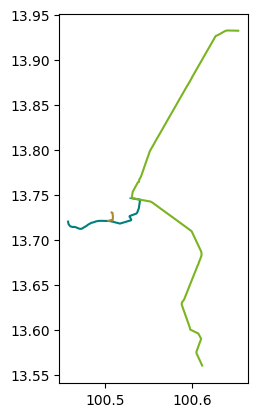

In [307]:
bts_line_df.plot(color=bts_line_df['color'])

In [308]:
bts_station_df = pd.read_csv(f'{base_path}/data/bkk/bts/bts_station.csv')

bts_station_df['id_btsline'] = bts_station_df['id_btsline'].astype(str).str.zfill(3)
bts_station_df['color'] = bts_station_df['id_btsline'].map(bts_color_dict)




In [309]:
bts_station_df

,idstation,name,location,id_btsline,btsline,dcode,dname,station_co,lat,lng,color
0,N8,สถานีหมอชิต,บริเวณหน้าสวนจตุจักร เป็นจุดเชื่อมต่อการเดินทา...,002,เส้นทางรถไฟฟ้าบีทีเอส สายสุขุมวิท (สีเขียวอ่อน),1030,เขตจตุจักร,สถานีเชื่อมต่อเส้นทางรถไฟฟ้ามหานคร สายสีน้ำเงิ...,13.802623,100.553812,#7AB420
1,N7,สถานีสะพานควาย,โรงพยาบาลเปาโล-ที่ทำการไปรษณีย์สามเสน,002,เส้นทางรถไฟฟ้าบีทีเอส สายสุขุมวิท (สีเขียวอ่อน),1014,เขตพญาไท,NaN,13.793863,100.549750,#7AB420
2,N5,สถานีอารีย์,บริเวณสามแยกซอยพหลโยธิน 7 (อารีย์),002,เส้นทางรถไฟฟ้าบีทีเอส สายสุขุมวิท (สีเขียวอ่อน),1014,เขตพญาไท,NaN,13.779550,100.544578,#7AB420
3,N4,สถานีสนามเป้า,บริเวณด้านหน้ากองพลทหารม้าที่ 2 รักษาพระองค์ ด...,002,เส้นทางรถไฟฟ้าบีทีเอส สายสุขุมวิท (สีเขียวอ่อน),1014,เขตพญาไท,NaN,13.772551,100.542072,#7AB420
4,N3,สถานีอนุสาวรีย์ชัยสมรภูมิ,บริเวณทิศใต้ของอนุสาวรีย์ชัยสมรภูมิ,002,เส้นทางรถไฟฟ้าบีทีเอส สายสุขุมวิท (สีเขียวอ่อน),1037,เขตราชเทวี,NaN,13.762703,100.537032,#7AB420
...,...,...,...,...,...,...,...,...,...,...,...
58,E20,สถานีศรีนครินทร์,ถนนสุขุมวิท บริเวณสะพานข้ามคลองบางปิ้งและทางแย...,002,เส้นทางรถไฟฟ้าบีทีเอส สายสุขุมวิท (สีเขียวอ่อน),,NaN,NaN,13.591966,100.609011,#7AB420
59,E21,สถานีแพรกษา,ถนนสุขุมวิท บริเวณด้านหน้าโรงเรียนสมุทรปราการ,002,เส้นทางรถไฟฟ้าบีทีเอส สายสุขุมวิท (สีเขียวอ่อน),,NaN,NaN,13.584217,100.607850,#7AB420
60,E22,สถานีสายลวด,ถนนสุขุมวิท บริเวณปากซอยเทศบาลบางปู 43 ใกล้ทาง...,002,เส้นทางรถไฟฟ้าบีทีเอส สายสุขุมวิท (สีเขียวอ่อน),,NaN,NaN,13.577797,100.605432,#7AB420
61,E23,สถานีเคหะฯ,ถนนสุขุมวิท บริเวณปากซอยเทศบาลบางปู 50 ในพื้นท...,002,เส้นทางรถไฟฟ้าบีทีเอส สายสุขุมวิท (สีเขียวอ่อน),,NaN,NaN,13.567731,100.607711,#7AB420


In [325]:

def plot_bts_data(fig):
  for idx, row in bts_line_df.iterrows():
      geom = row.geometry
      color = row['color']

      # Ensure we can iterate over one or many lines
      lines = geom#[geom] if isinstance(geom, LineString) else geom.geoms
      lat =[x[1] for x in lines.coords]
      lon =[x[0] for x in lines.coords]
      fig.add_trace(go.Scattermapbox(
          lat=lat,
          lon=lon,
          mode = "lines",
          line=dict(color=color, width=2),
          hoverinfo='skip',
          showlegend=False
      ))
  fig.add_trace(go.Scattermapbox(
    lat=bts_station_df['lat'],
    lon=bts_station_df['lng'],
    customdata=bts_station_df[bts_station_df.columns].values,
    mode='markers',
    marker=dict(
        # size=df_min_rent['Rent'] / 1000,  # Adjust the size of markers based on rent
        color=bts_station_df['color'],  # Color by rent
    ),
    text=df_min_rent['Rent'],  # Display rent value when hovering over the marker
    hovertemplate=(
        "<b>Location:</b> %{customdata[4]}<br>" +
        "<extra></extra>"  # Removes the extra info that shows by default
    )
))
  return fig

In [312]:
fig = plot_bts_data(fig)
fig.show()

[13.721327454887541, 13.720559246999388, 13.72018981100229, 13.719106898385084, 13.718157902623236, 13.717823097849994, 13.717668394793424, 13.717204285012022, 13.716580852518113, 13.71630838890833, 13.715770387800822, 13.715357072807803, 13.71501995501212, 13.714876795253911, 13.714789052133085, 13.714685145763358, 13.714583548379673, 13.71442422512122, 13.714297228243566, 13.714234884296609, 13.714232575261203, 13.714218721048471, 13.714299537278299, 13.71431108245169, 13.714299537278299, 13.714160995153023, 13.714117123462955, 13.71360913487578, 13.713190620725273, 13.712942398187051, 13.712546973369133, 13.712304522786459, 13.71221216059393, 13.712191956359453, 13.712220819551026, 13.712292977514402, 13.712483474431274, 13.712858695179015, 13.712971261286445, 13.713392662132415, 13.713923741573423, 13.714316277779595, 13.71461645208261, 13.715317819390732, 13.715615106136024, 13.715782510156986, 13.715889302314851, 13.716131749195728, 13.716293380310368, 13.716607983411098, 13.7168

In [313]:
mrt_color_dict = {
    '001':'#0E4285',
    '002':'#784A96',
    '003':'#FFD500'
}

In [314]:
mrt_line_df = gpd.read_file(f'{base_path}/data/bkk/mrt/mrt_line.zip',encoding='windows-874')
mrt_line_df['color'] = mrt_line_df['id_mrtline'].map(mrt_color_dict)
mrt_line_df = mrt_line_df.set_crs(epsg=32647)  # Example: UTM Zone 47N (adjust if needed)
mrt_line_df = mrt_line_df.to_crs(epsg=4326)    # Reproject to lat/lon

<Axes: >

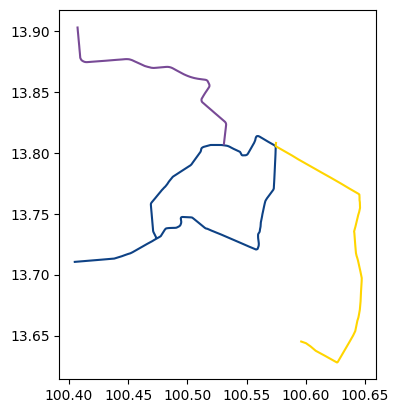

In [315]:
mrt_line_df.plot(color=mrt_line_df['color'])

In [316]:
mrt_station_df = gpd.read_file(f'{base_path}/data/bkk/mrt/mrt_station.zip',encoding='windows-874')
mrt_station_df['color'] = mrt_station_df['id_mrtline'].map(mrt_color_dict)
mrt_station_df = mrt_station_df.set_crs(epsg=32647)  # Example: UTM Zone 47N (adjust if needed)
mrt_station_df = mrt_station_df.to_crs(epsg=4326)

In [317]:
mrt_station_df

,name,location,dcode,id_mrtline,id_station,station_co,geometry,color
0,สถานีคลองเตย,ถนนพระรามที่ 4 ด้านหน้าสำนักงานการไฟฟ้านครหลวง...,1033,001,BL24,None,POINT (100.55401 13.72229),#0E4285
1,สถานีศูนย์การประชุมแห่งชาติสิริกิติ์,ถนนรัชดาภิเษกตัดใหม่ ด้านหน้าศูนย์การประชุมแห่...,1033,001,BL23,None,POINT (100.5599 13.72262),#0E4285
2,สถานีบางซื่อ,ใกล้สถานีรถไฟบางซื่อ ถนนเทอดดำริ,1030,001,BL11,None,POINT (100.54103 13.80235),#0E4285
3,สถานีสวนจตุจักร,ถนนพหลโยธิน ฝั่งทิศตะวันตก ในอาณาเขตสวนจตุจักร...,1030,001,BL13,None,POINT (100.55336 13.80295),#0E4285
4,สถานีลาดพร้าว,ถนนลาดพร้าว บริเวณทิศตะวันตกของสี่แยกรัชดา-ลาด...,1030,001,BL15,None,POINT (100.5729 13.80652),#0E4285
...,...,...,...,...,...,...,...,...
71,สถานีศรีแบริ่ง,ถนนศรีนครินทร์ บริเวณปากซอยศรีด่าน 13 ใกล้กับท...,None,003,YL19,None,POINT (100.63621 13.64356),#FFD500
72,สถานีศรีด่าน,ตำบลสำโรงเหนือ อำเภอเมืองสมุทรปราการ จังหวัดสม...,None,003,YL20,None,POINT (100.63 13.63321),#FFD500
73,สถานีศรีเทพา,หมู่ที่ 3 บ้านทิพวัล ตำบลเทพารักษ์ อำเภอเมืองส...,None,003,YL21,None,POINT (100.62271 13.62995),#FFD500
74,สถานีทิพวัล,หมู่ที่ 3 บ้านทิพวัล ตำบลเทพารักษ์ อำเภอเมืองส...,None,003,YL22,None,POINT (100.60994 13.63677),#FFD500


<Axes: >

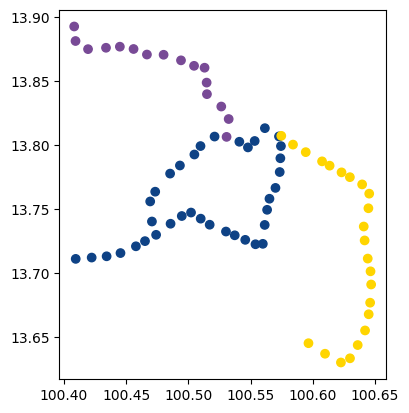

In [318]:
mrt_station_df.plot(color=mrt_station_df['color'])

In [319]:
def plot_mrt_data(fig):
  for idx, row in mrt_line_df.iterrows():
      geom = row.geometry
      color = row['color']

      # Ensure we can iterate over one or many lines
      lines = geom#[geom] if isinstance(geom, LineString) else geom.geoms
      lat =[x[1] for x in lines.coords]
      lon =[x[0] for x in lines.coords]
      fig.add_trace(go.Scattermapbox(
          lat=lat,
          lon=lon,
          mode = "lines",
          line=dict(color=color, width=2),
          hoverinfo='skip',
          showlegend=False
      ))
  fig.add_trace(go.Scattermapbox(
       lat=mrt_station_df.geometry.y.tolist(),  # from Point geometry
        lon=mrt_station_df.geometry.x.tolist(),
    # customdata=mrt_station_df[mrt_station_df.columns].values,
    mode='markers',
    marker=dict(
        # size=df_min_rent['Rent'] / 1000,  # Adjust the size of markers based on rent
        color=mrt_station_df['color'],  # Color by rent
    ),
    # text=df_min_rent['Rent'],  # Display rent value when hovering over the marker
    # hovertemplate=(
    #     "<b>Location:</b> %{customdata[4]}<br>" +
    #     "<extra></extra>"  # Removes the extra info that shows by default
    # )
))
  return fig

In [320]:
fig = plot_mrt_data(fig)
fig.show()